<a href="https://colab.research.google.com/github/MaryMbugua109/MaryMbugua109/blob/main/MaryMbugua__PythonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing our libraries

In [11]:
#Importing the libraries that we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
#Loading our uploaded dataset
autolib=pd.read_csv('autolib_daily_events_postal_code.csv')
autolib
#Previewing the first 5 rows
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


##DATA CLEANING

###1.Converting the columns to lowercase

In [13]:
#Pre-processing 1
#Converting the columns to lowercase
autolib.columns=map(str.lower,autolib.columns)
autolib

,postal code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


###2.Removing white spaces

In [14]:
#Pre-processing
#Removing white spaces and replacing them with(-)
autolib.columns = autolib.columns.str.strip().str.replace(' ','_')
autolib

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


###3.Missing values

In [15]:
#Finding how many missing values we have in each column
autolib.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [16]:
#Dropping unnecessary columns
autolib.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
autolib

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


In [17]:
autolib.shape

(16085, 5)

###4.Duplicates

In [18]:
#Checking for duplicates
autolib.duplicated().any()

True

In [19]:
#Dropping duplicates
autolib.drop_duplicates()

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


##OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

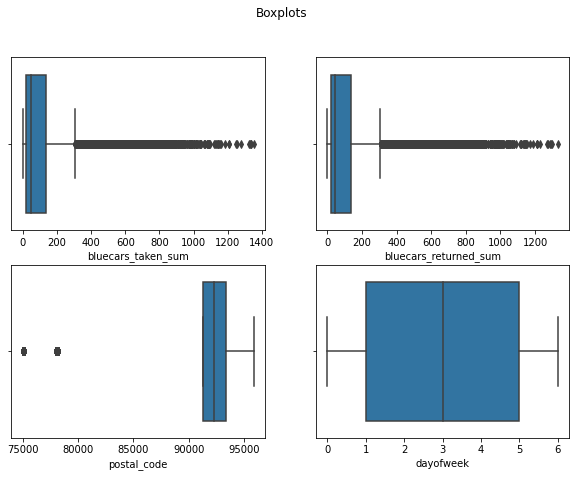

In [66]:
#Finding outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(autolib['bluecars_taken_sum'], ax=ax1)
sns.boxplot(autolib['bluecars_returned_sum'], ax=ax2)
sns.boxplot(autolib['postal_code'], ax=ax3)
sns.boxplot(autolib['dayofweek'], ax=ax4)
plt.show()

##ANOMALIES

In [20]:
#Finding anomalies
q1_bluecars_taken_sum = autolib['bluecars_taken_sum'].quantile(.25)
q3_bluecars_taken_sum = autolib['bluecars_taken_sum'].quantile(.75)

iqr_bluecars_taken_sum = q3_bluecars_taken_sum - q1_bluecars_taken_sum
print(iqr_bluecars_taken_sum)




115.0


In [21]:
#Extracting day time data
autolib1=autolib[autolib.day_type=='weekend']
autolib1
#Previewing the first rows
autolib1.head()



,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
5,75001,5,weekend,187,185
6,75001,6,weekend,180,180
12,75001,5,weekend,224,223
13,75001,6,weekend,193,193
19,75001,5,weekend,217,217


##UNIVARIATE ANALYSIS

In [22]:
#Univariate analysis
#Getting the proportion of the day of the week
autolib1['dayofweek'].value_counts(normalize=True)*100


6    50.077076
5    49.922924
Name: dayofweek, dtype: float64

From the dataset,the days of the week are coded with 5 being saturday and 6 sunday

In [24]:
#using the describe function to summarize the dataset
autolib1[['bluecars_taken_sum','bluecars_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum
count,4541.000000,4541.000000
mean,151.090068,152.029289
std,218.565642,221.140337
min,0.000000,0.000000
25%,25.000000,24.000000
50%,59.000000,58.000000
75%,156.000000,157.000000
max,1352.000000,1332.000000


Text(0.5, 1.0, 'Blue car taken rate per day of the week')

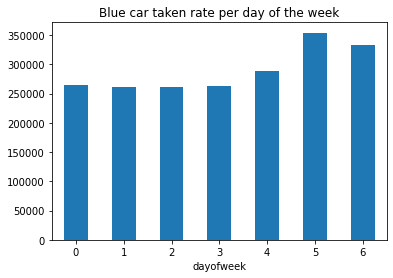

In [25]:
#Plot of rate of blue cars takenper dayof the week
autolib.groupby('dayofweek')['bluecars_taken_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Blue car taken rate per day of the week')

We observe that bluecars are taken/on demand mostly on Saturdays and Sunday

Text(0.5, 1.0, 'Blue car return rate per day of the week')

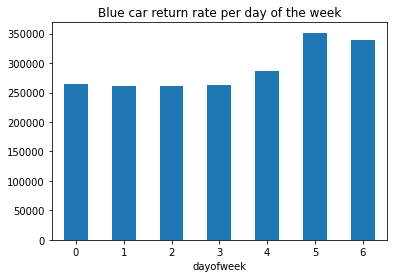

In [26]:
#Plotting the Return rate of blue cars per dayof the week
autolib.groupby('dayofweek')['bluecars_returned_sum'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Blue car return rate per day of the week')

We observe that bluecars are returned the most on Saturday

##BIVARIATE ANALYSIS

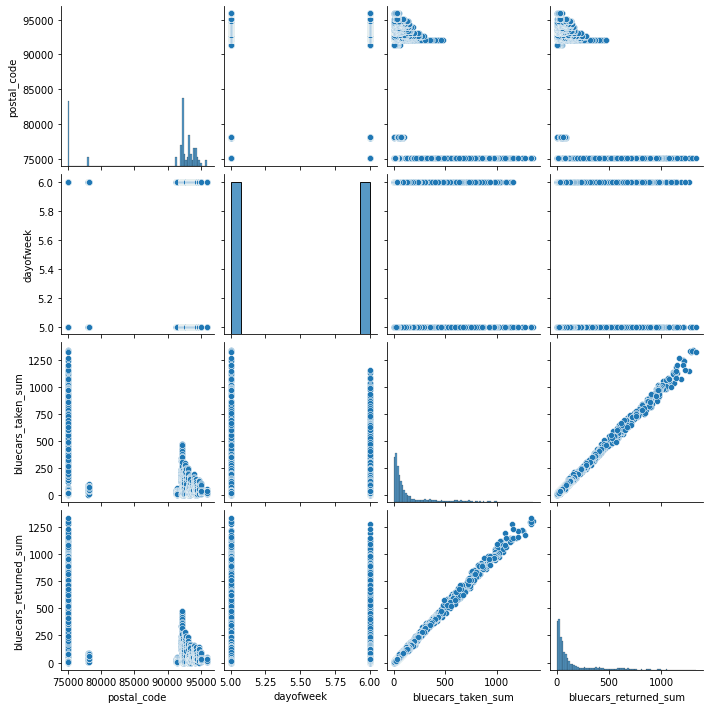

In [27]:
#Plotting our bivariate summaries and recording the observations
sns.pairplot(autolib1)
plt.show()

##CORRELATION

In [28]:
#Determining the correlation between bluecars taken sum and bluecars returned sum
autolib1['bluecars_taken_sum'].corr(autolib1['bluecars_returned_sum'])

0.9985777392530121

This indicates a high correlation between bluecars taken sum and bluecars returned sum

##HEATMAP

In [29]:
autolib2=autolib1.drop(['postal_code','dayofweek'],axis=1,inplace=True)
autolib2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


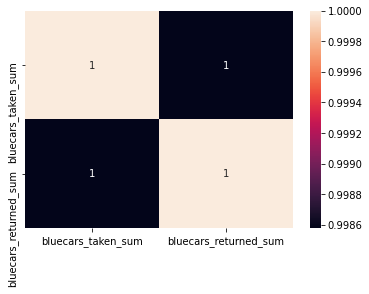

In [30]:
sns.heatmap(autolib1.corr(),annot=True)
plt.show()



##HYPOTHESES TESTING

In [ ]:
#Stating the hypotheses
#Ho: The average number of bluecars taken is equal tp bluecars returned in weekdays
#H1: The average number of bluecars taken is not equal to bluecars returned sum in weekdays

In [31]:
# Determine the average number of bluecars picked up per day by postalcode
average_pickup = autolib.groupby(['postal_code'])['bluecars_taken_sum'].mean().sort_values(ascending=False)

In [32]:
#We need to know the top 10 postal codes with average pickups
average_pickup.head(10)

postal_code
75015    896.955128
75016    790.301282
75017    734.493590
75013    541.596154
75019    525.467949
75012    497.256410
75014    486.294872
75011    480.378205
75020    463.660256
75008    437.480769
Name: bluecars_taken_sum, dtype: float64

In [33]:
#Last postal codes with minimum average pickup scores
average_pickup.tail()

postal_code
93150    5.258278
94100    4.832258
93370    3.744966
93390    3.630952
93440    3.443709
Name: bluecars_taken_sum, dtype: float64

In [34]:
# Determining the average number of bluecars returned per day by postalcode
average_dropoff = autolib.groupby(['postal_code'])['bluecars_returned_sum'].mean().sort_values(ascending=False)

In [35]:
#Determining the postal codes with most returned bluecars
average_dropoff.head(10)

postal_code
75015    897.070513
75016    789.884615
75017    734.237179
75013    541.339744
75019    525.788462
75012    497.352564
75014    486.006410
75011    480.448718
75020    464.134615
75008    437.147436
Name: bluecars_returned_sum, dtype: float64

In [36]:
#The postal codes with low avarage returned bluecars
average_dropoff.tail()

postal_code
93150    5.225166
94100    4.812903
93370    3.731544
93390    3.595238
93440    3.483444
Name: bluecars_returned_sum, dtype: float64

In [58]:
#Calculating the Z score
# Stratified sample
df4 = autolib.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df4

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
14561,94300,0,weekday,32,31
7008,92260,0,weekday,14,26
9046,92410,0,weekday,44,48
11475,93310,0,weekday,16,16
11631,93350,0,weekday,13,11
...,...,...,...,...,...
3259,75112,6,weekend,21,18
10099,93100,6,weekend,192,191
13143,94100,6,weekend,8,7
12275,93440,6,weekend,0,1


In [59]:
#Population mean
a = autolib['bluecars_taken_sum'].mean()
print(a)
b= df4['bluecars_taken_sum'].mean()
print(b)
c = df4['bluecars_taken_sum'].std()
c

125.92695057506994
125.15049751243781


185.55153592099316

In [63]:
zscore=(b-a)/c
(125.2-125.9)/185

-0.0037837837837837993

In [64]:
#Calculating the p value
from scipy.stats import norm
import scipy.stats as stats
pro = stats.norm.cdf(zscore)
pro

0.49833060367901755

In [65]:
#interpretation of the p value
if pro < 0.05:    # alpha value is 0.05 or 5% level of significance
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


We therefore conclude that theres no enough evidence/ difference to say that the null hypothesis is true

In [67]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

autolib['bluecars_taken_sum'].mean() - df4['bluecars_taken_sum'].mean()

0.7764530626321289

In [68]:
import math
sample_mean = df4['bluecars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = autolib['bluecars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(104.02659177309528, 146.27440325178034)
